In [27]:
#Table of contents
#Importing Necessary Libraries
#Get the Data
#Describe what's the data about
#Interpretation
#Deep Dive into the visualizations
#How well do Avacados sell over different regions
#Data Prepration
#Colinearity

#Our task is to Build models to predict the average price over the coming years.

In [28]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
##Get the Data
df1 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')

In [30]:
#The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it !
df1.drop(['Unnamed: 0'], axis = 1, inplace=True) # Removing the un-known column

In [31]:
df1.shape

(16468, 13)

In [32]:
df1.sort_values(by=['Date'], inplace=True, ascending=True)
df1.reset_index(drop=True, inplace=True)
df1.head() # Look at the Data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,01-02-2015,0.93,4924049.79,3656338.95,451194.73,40258.76,776257.35,359145.48,417111.87,0.00,conventional,2015.0,Southeast
1,01-02-2015,1.06,283137.88,42732.12,168621.69,851.33,70932.74,69529.64,1403.10,0.00,conventional,2015.0,HarrisburgScranton
2,01-02-2015,0.56,1544750.92,1194635.06,261342.47,6335.66,82437.73,82437.73,0.00,0.00,conventional,2015.0,PhoenixTucson
3,01-02-2015,0.97,135656.36,35897.25,84741.31,2704.69,12313.11,12276.59,36.52,0.00,conventional,2015.0,Spokane
4,01-02-2015,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015.0,TotalUS


In [33]:


df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [34]:
df1.describe()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [35]:
# Check Null Values

df1.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [36]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,1517,104,12-04-2015,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveragePrice,1517.0,NaN,NaN,NaN,1.07499,0.188891,0.49,0.98,1.08,1.19,1.68
Total Volume,1517.0,NaN,NaN,NaN,1601879.067838,4433142.820746,38750.74,147469.99,402791.86,981975.08,44655461.51
4046,1517.0,NaN,NaN,NaN,646438.654113,1947613.569742,467.72,20400.34,81751.17,377578.48,18933038.04
4225,1517.0,NaN,NaN,NaN,611437.502591,1672906.164662,1783.77,41476.06,118664.89,485150.34,18956479.74
4770,1517.0,NaN,NaN,NaN,50405.495399,137781.249242,0.0,911.25,7688.17,29167.3,1381516.11
Total Bags,1517.0,NaN,NaN,NaN,293597.415735,757976.531316,3311.77,36206.89,73979.06,157609.68,6736304.04
Small Bags,1517.0,NaN,NaN,NaN,248773.595287,647476.520502,3311.77,29727.22,62375.69,146199.35,5893641.72
Large Bags,1517.0,NaN,NaN,NaN,42642.049374,118215.681838,0.0,540.74,5044.35,29267.67,1121076.47
XLarge Bags,1517.0,NaN,NaN,NaN,2181.771074,7455.712144,0.0,0.0,0.0,401.48,108072.79


In [69]:

df1=df1.dropna(axis = 0, how ='any')



In [70]:
df1.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [71]:
df1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


In [72]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-01-02,0.93,4924049.79,3656338.95,451194.73,40258.76,776257.35,359145.48,417111.87,0.00,conventional,2015.0,Southeast,1.0,2.0
1,2015-01-02,1.06,283137.88,42732.12,168621.69,851.33,70932.74,69529.64,1403.10,0.00,conventional,2015.0,HarrisburgScranton,1.0,2.0
2,2015-01-02,0.56,1544750.92,1194635.06,261342.47,6335.66,82437.73,82437.73,0.00,0.00,conventional,2015.0,PhoenixTucson,1.0,2.0
3,2015-01-02,0.97,135656.36,35897.25,84741.31,2704.69,12313.11,12276.59,36.52,0.00,conventional,2015.0,Spokane,1.0,2.0
4,2015-01-02,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015.0,TotalUS,1.0,2.0


In [73]:
background_color = '#F8EDF4'
color_palette = ['#F78904', '#00C73C', '#D2125E', '#693AF9', '#B20600', '#007CDE', '#994936', '#886A00', '#39BBC2']

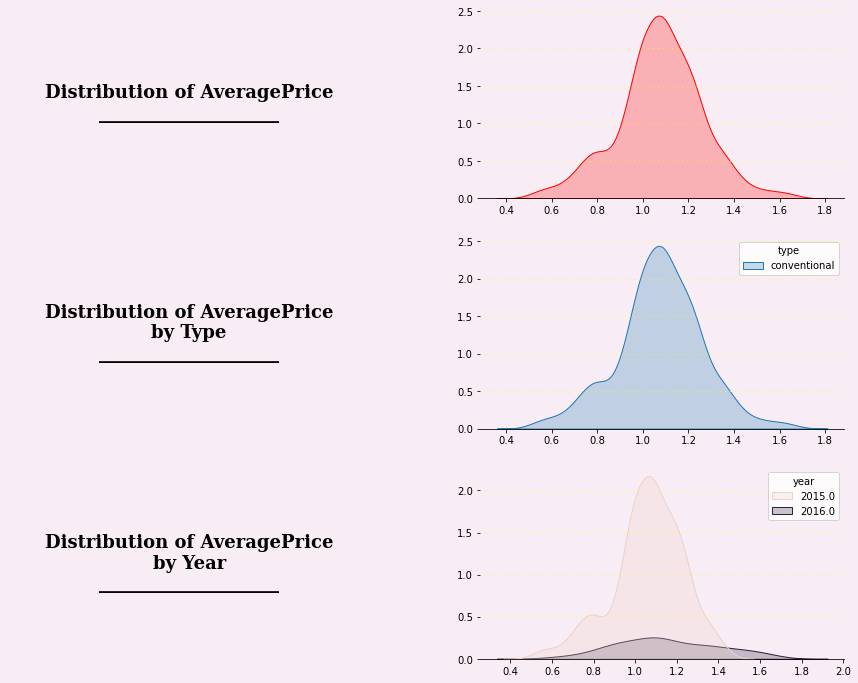

In [74]:
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(3, 2)
gs.update(hspace=0.2, wspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
fig.patch.set_facecolor(background_color)

axes = [ax0, ax1, ax2, ax3, ax4, ax5]


# Title1
ax0.text(0.5, 0.5, 'Distribution of AveragePrice\n____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold', fontfamily='serif')

# Graph1
sns.kdeplot(x='AveragePrice', data=df1, fill=True, ax=ax1, color='red')

# Title2
ax2.text(0.5, 0.5, 'Distribution of AveragePrice\nby Type\n____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold', fontfamily='serif')

# Graph2
sns.kdeplot(x='AveragePrice', data=df1, fill=True, hue='type', ax=ax3, color='pink')



# Title3
ax4.text(0.5, 0.5, 'Distribution of AveragePrice\nby Year\n____________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontweight='bold', fontfamily='serif')
# Graph3
sns.kdeplot(x='AveragePrice', data=df1, hue='year',fill=True, ax=ax5,color='pink')



# Settings
for ax in axes:
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

for ax in [ax0, ax2, ax4]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
    ax.spines[['bottom']].set_visible(False)


for ax in [ax1, ax3, ax5]:
    ax.grid(color='yellow', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax.set_xlabel('')
    ax.set_ylabel('')        

In [75]:
#Distribution of Continuous Features
cont_features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


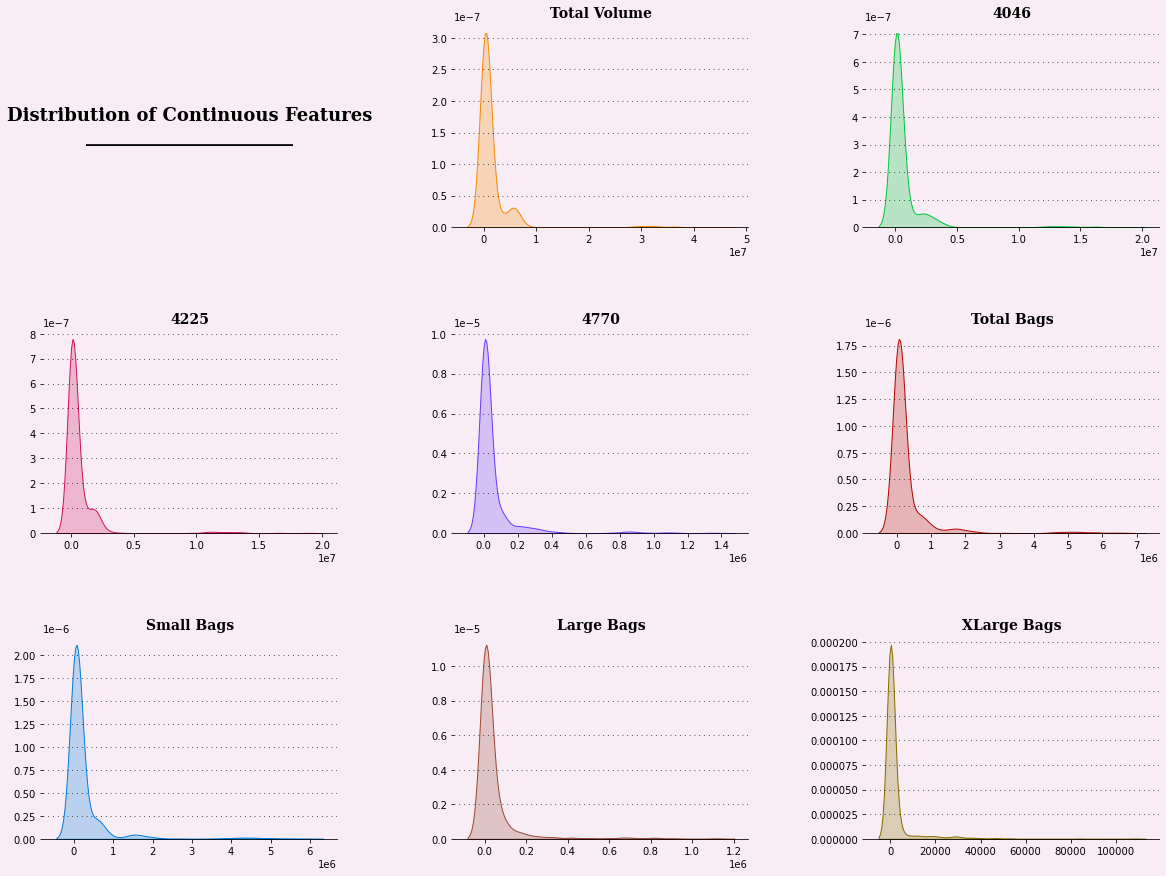

In [76]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
fig.patch.set_facecolor(background_color)

# Title
ax0.text(0.5, 0.5, 'Distribution of Continuous Features\n_______________________',
        fontsize=18, fontfamily='serif', fontweight='bold',
        horizontalalignment='center',
        verticalalignment='center')

# Graphs
for i, ax in enumerate(axes):
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)
        
    ax.set_facecolor(background_color)
    
    if i == 0:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)
        ax.spines[['bottom']].set_visible(False)
    else:
        ax.set_title(cont_features[i-1], fontsize=14, fontfamily='serif', fontweight='bold')
        ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
        sns.kdeplot(x=cont_features[i-1], data=df1, ax=ax, color=color_palette[i-1], fill=True)
        ax.set_xlabel('')
        ax.set_ylabel('')

In [143]:
df1[cont_features].skew()

Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
dtype: float64

In [144]:
#still skewed.So,Used higher root
np.sqrt(df1[cont_features]).skew()

Total Volume    3.129360
4046            2.883385
4225            2.891611
4770            2.531303
Total Bags      2.951677
Small Bags      2.956167
Large Bags      2.517165
XLarge Bags     2.916661
dtype: float64

In [145]:
(df1[cont_features] ** (1/6)).skew()


Total Volume    1.308020
4046            0.746916
4225            0.903980
4770            0.542355
Total Bags      1.401370
Small Bags      1.394554
Large Bags     -0.008198
XLarge Bags     0.901956
dtype: float64

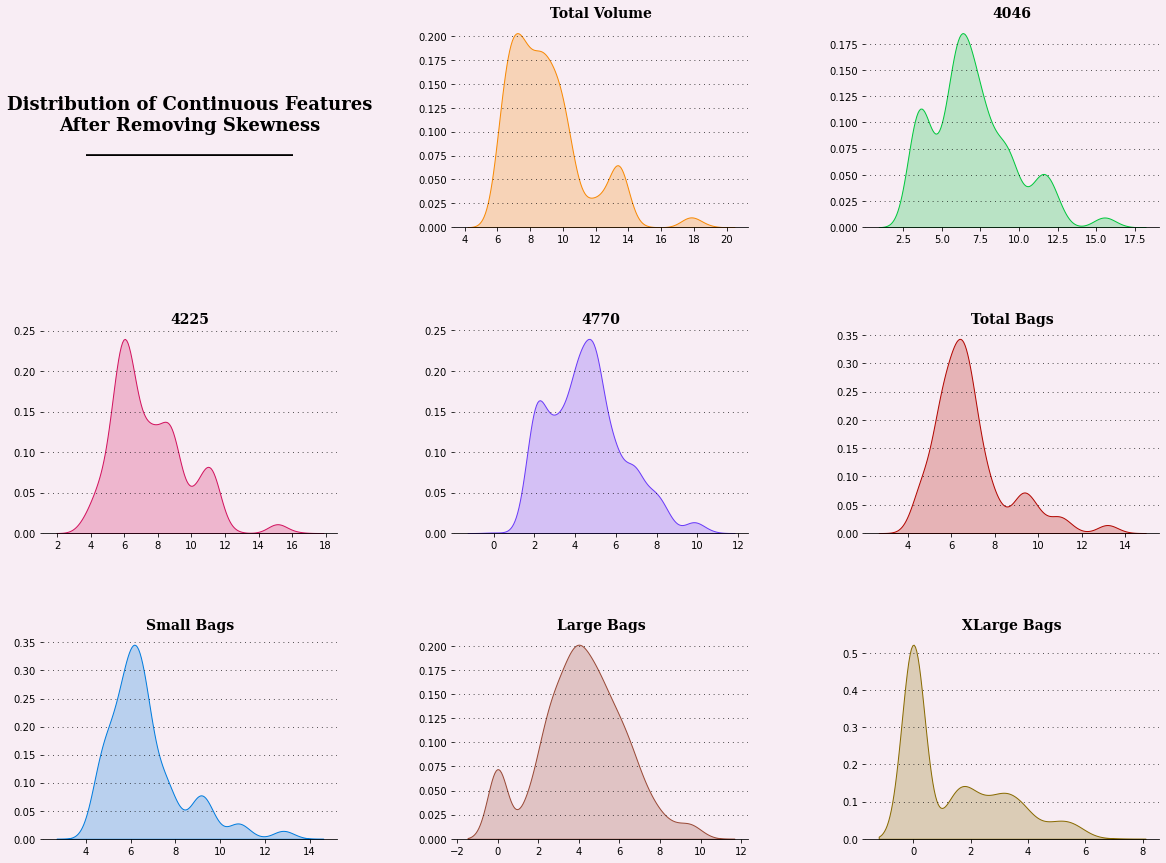

In [146]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.5)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
fig.patch.set_facecolor(background_color)

# Title
ax0.text(0.5, 0.5, 'Distribution of Continuous Features\nAfter Removing Skewness\n_______________________',
        fontsize=18, fontfamily='serif', fontweight='bold',
        horizontalalignment='center',
        verticalalignment='center')
# Graphs
for i, ax in enumerate(axes):
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)
        
    ax.set_facecolor(background_color)
    
    if i == 0:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.tick_params(left=False, bottom=False)
        ax.spines[['bottom']].set_visible(False)
    else:
        ax.set_title(cont_features[i-1], fontsize=14, fontfamily='serif', fontweight='bold')
        ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
        sns.kdeplot(x=df1[cont_features[i-1]]**(1/6), ax=ax, color=color_palette[i-1], fill=True)
        ax.set_xlabel('')
        ax.set_ylabel('')

In [81]:
#'XLarge Bags' is still skewed, but the others look much better.

In [82]:
#Correlation Matrix
df1.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452,0.019315
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.013144,0.029744


<AxesSubplot:>

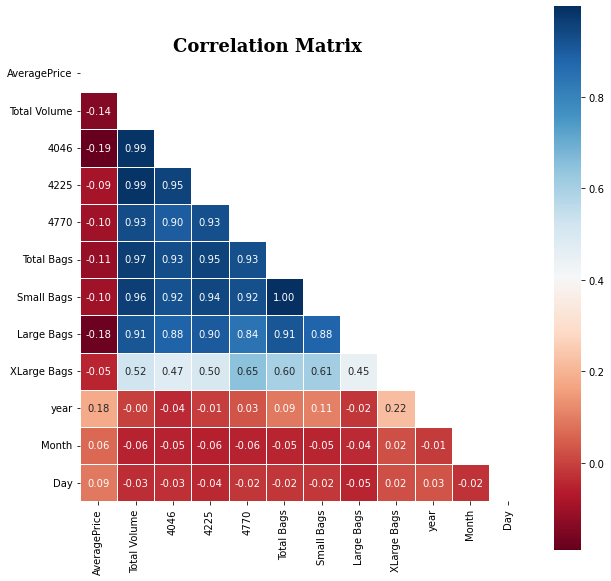

In [83]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))

mask = np.triu(np.ones_like(df1.corr()))
ax.text(2.5, -0.1, 'Correlation Matrix', fontsize=18, fontweight='bold', fontfamily='serif')
sns.heatmap(df1.corr(), annot=True, fmt='.2f', cmap='RdBu', 
            square=True, mask=mask, linewidth=0.7, ax=ax)

In [84]:
#Feature Engineering:
#Extracting Date and month from Date column.
df1["Date"]=pd.to_datetime(df1["Date"])

In [85]:
#Date column data type has changed to datetime

In [86]:
#Extracting month from Date column
df1["Month"]=df1["Date"].dt.month

In [87]:
#Extracting day from Date column
df1["Day"]=df1["Date"].dt.day

In [88]:
#Visualization:
#Univariate Analysis:
continuous_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_cols = ['year', 'Day', 'Month', 'type', 'region']

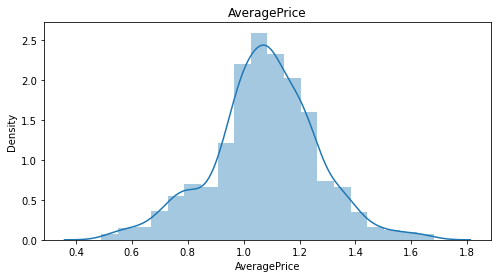

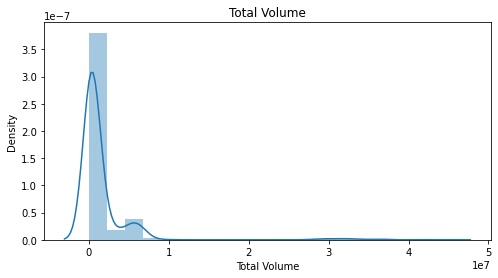

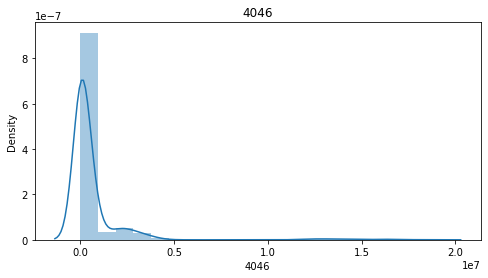

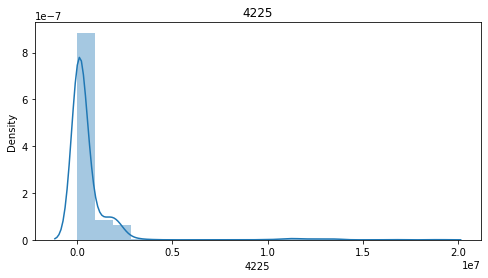

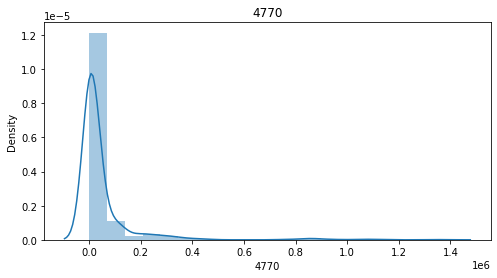

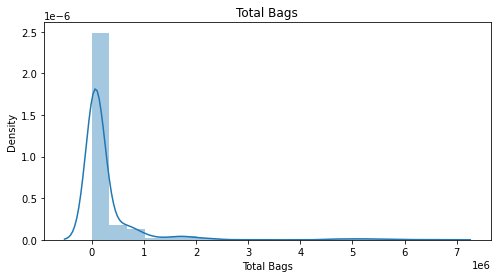

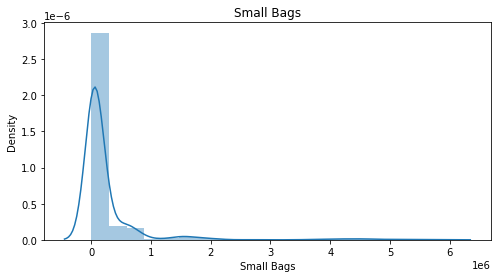

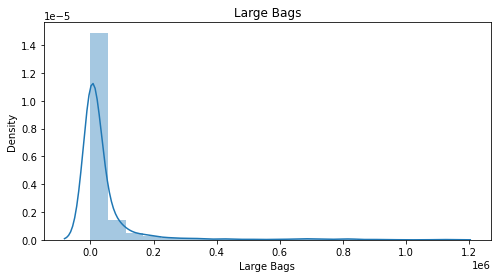

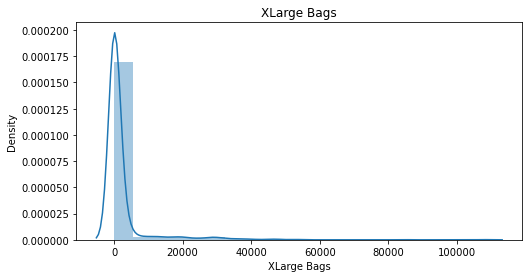

In [89]:
for i in df1[continuous_cols]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df1[i], bins = 20)
    plt.title(i)
    plt.show()

In [91]:
df1.year.value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

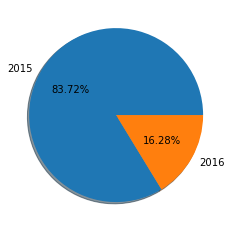

In [92]:
#Ploting pie chart for year 2015
labels='2015','2016'
fig, ax = plt.subplots()
ax.pie(df1['year'].value_counts(),labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

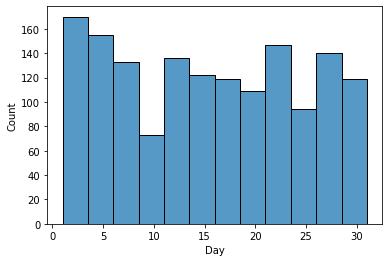

In [93]:
#Count plot for Month
sns.histplot(df1['Day']);


In [94]:
##In 1st,11th,23rd and 28st days the count is very high

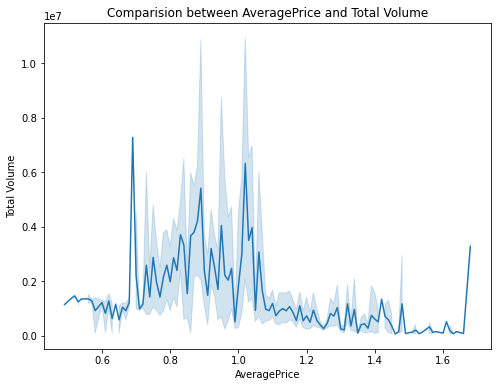

In [95]:
#Bivariate Analysis:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between AveragePrice and Total Volume')
sns.lineplot(df1['AveragePrice'],df1['Total Volume']);

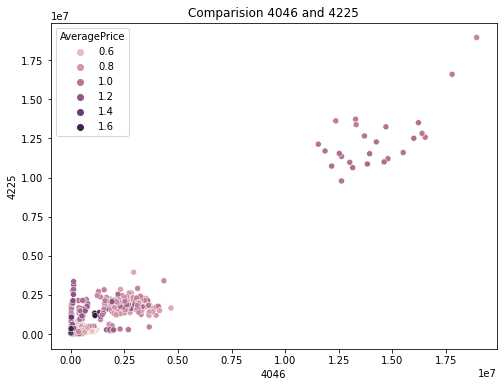

In [96]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision 4046 and 4225')
sns.scatterplot(df1['4046'],df1['4225'],hue=df1["AveragePrice"]);

In [97]:
#'Label Encoding' for the categorical features.
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df1['type'] = label.fit_transform(df1['type'])
df1['region'] = label.fit_transform(df1['region'])

In [98]:
#The points are dense in 0 to 0.5 for both 4046 and 4225 PLU, which means these both has less AveragePrice count.

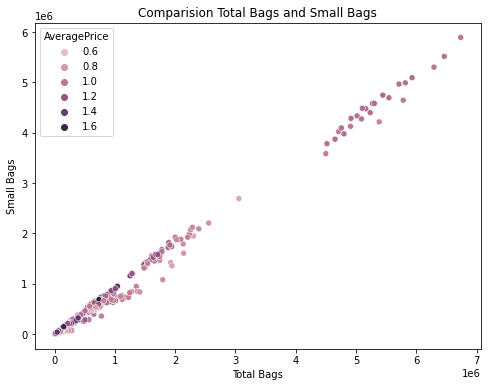

In [99]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(df1['Total Bags'],df1['Small Bags'],hue=df1["AveragePrice"]);

In [100]:
# In this there is linear distribution of Total bags and Small bags.

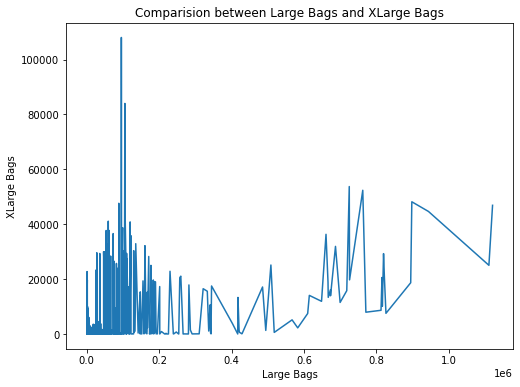

In [101]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Large Bags and XLarge Bags')
sns.lineplot(df1['Large Bags'],df1['XLarge Bags']);

In [102]:
#some extreme outliers is present here

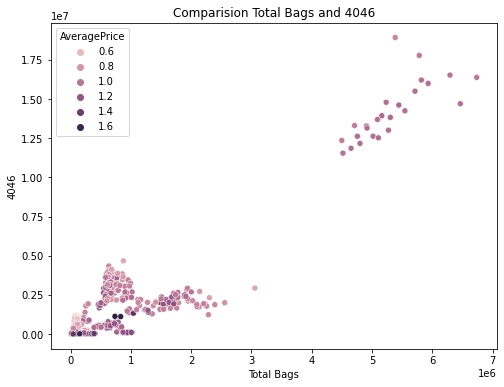

In [103]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and 4046')
sns.scatterplot(df1['Total Bags'],df1['4046'],hue=df1["AveragePrice"]);

In [104]:
##Above plot says that the count is more with less Total Bags and 4046 PLU.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

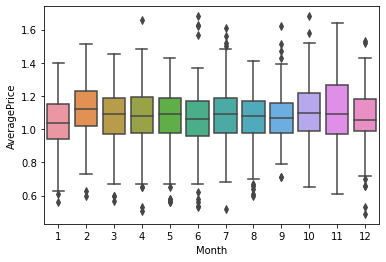

In [105]:
sns.boxplot(x='Month',y='AveragePrice',data=df1)

In [106]:
#In November the Average Price for Avacado is high.

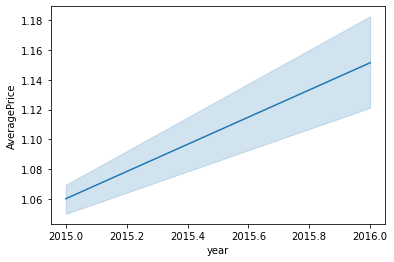

In [107]:
sns.lineplot(x = 'year', y = 'AveragePrice', data = df1, palette= 'Blues');

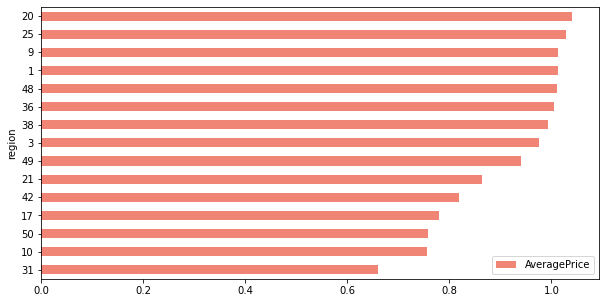

In [108]:
df_test = df1.groupby(["region"]).mean()
df_test = pd.DataFrame(df_test['AveragePrice'].sort_values())[:15]
exp_ava_city = df_test.iloc[-1]
cheapest_ava_city = df_test.iloc[0]
df_test.plot(y='AveragePrice', kind='barh', figsize=(10, 5), color=(0.9, 0.2, 0.1, 0.6));

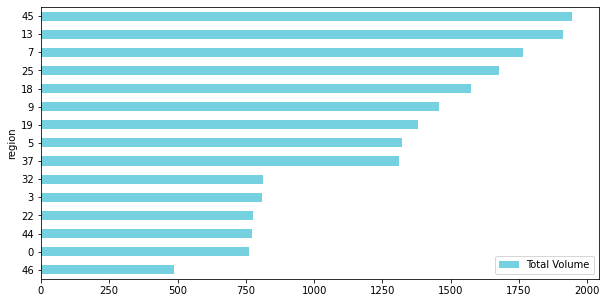

In [109]:
# Check cheapest region
df_test = df1.groupby(["region"]).mean()
df_test['Total Volume'] = df_test['Total Volume'] / 100
df_test = pd.DataFrame(df_test['Total Volume'].sort_values())[:15]
df_test.plot(y = 'Total Volume', kind = 'barh', figsize = (10, 5), color=(0.1, 0.7, 0.8, 0.6));

In [110]:
cheapest_ava_city, exp_ava_city

(AveragePrice    0.659808
 Name: 31, dtype: float64,
 AveragePrice    1.041
 Name: 20, dtype: float64)

In [111]:
#Avacados are cheapest in PhoenixTucson and most expensive in LasVegas.

In [118]:
#'Label Encoding' for the categorical features.
#Preprocessing-'.
'Label Encoding' for the categorical features.from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df1['type'] = label.fit_transform(df1['type'])
df1['region'] = label.fit_transform(df1['region'])

In [122]:
#Get month from 'Date' and drop the column.
df1['Month'] = pd.to_datetime(df1['Date']).dt.month
df1.drop('Date', axis=1, inplace=True)

In [124]:
#Modeling
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df1.drop('AveragePrice', axis=1)
y = df1['AveragePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [125]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.2081
Test Score : 0.0748


In [126]:
#Ridge
model = Ridge()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.2081
Test Score : 0.0757


In [128]:
#Gradient Boost
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.8502
Test Score : 0.7196


In [129]:
#K-Nearest Neighbors
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.5755
Test Score : 0.3499


In [130]:
#Random Forest
model = RandomForestRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9727
Test Score : 0.8016


In [131]:
#Decision Tree
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 1.0000
Test Score : 0.7204


In [133]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

models = []
scores = []

In [134]:
#Ridge
param_grid = {'alpha' : [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model = Ridge()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
ridge_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(ridge_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Ridge')
scores.append(ridge_score)

Test Score : 0.0757
Best Parameters : {'alpha': 1}
Best CV Score : 0.1880


In [135]:
#Gradient Boost
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Gradient Boost')
scores.append(gb_score)

Test Score : 0.7876
Best Parameters : {'max_depth': 5}
Best CV Score : 0.7941


In [136]:
#K-Nearest Neighbors
param_grid = {'n_neighbors' : range(1, 20)}
model = KNeighborsRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
knr_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(knr_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('K-Nearest Neighbors')
scores.append(knr_score)

Test Score : 0.3430
Best Parameters : {'n_neighbors': 7}
Best CV Score : 0.3431


In [137]:
#Random Forest
param_grid = {'max_depth' : [5, 10, 15, 20, 25, 30]}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
rf_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(rf_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Random Forest')
scores.append(rf_score)

Test Score : 0.8145
Best Parameters : {'max_depth': 30}
Best CV Score : 0.7761


In [138]:
#Decision Tree
param_grid = {'max_depth' : range(2, 20), "min_samples_leaf" : range(2, 10)}
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
dt_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(dt_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Decision Tree')
scores.append(dt_score)

Test Score : 0.7194
Best Parameters : {'max_depth': 16, 'min_samples_leaf': 8}
Best CV Score : 0.6557


In [139]:
#Result
df_result = pd.DataFrame({'Model' : models, 'Score' : scores})
df_result

,Model,Score
0,Ridge,0.075715
1,Gradient Boost,0.787601
2,K-Nearest Neighbors,0.343030
3,Random Forest,0.814459
4,Decision Tree,0.719377


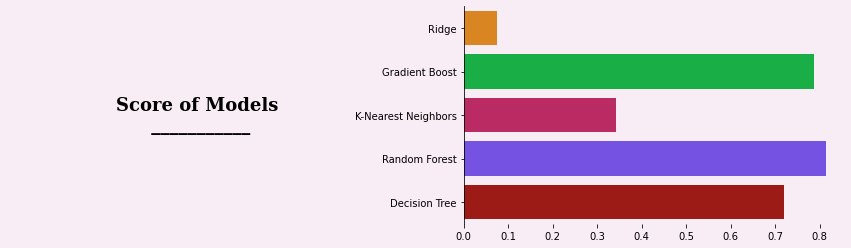

In [140]:
fig = plt.figure(figsize=(15, 4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Title
ax0.text(0.5, 0.5, 'Score of Models\n ___________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['left'].set_visible(False)

# Graph
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.barplot(x='Score', y='Model', data=df_result, palette=color_palette, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')


fig.patch.set_facecolor(background_color)
axes = [ax0, ax1]

for ax in axes:
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'bottom']:
        ax.spines[s].set_visible(False)